In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../Data/MachineLearningRating_v3.txt" , sep = "|")

/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_19245/203779286.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/MachineLearningRating_v3.txt" , sep = "|")


In [12]:
# --- Data Summarization ---
print("--- Data Structure ---")
df.info() # Review dtypes and non-null counts 

# Print the first 5 rows of the DataFrame
print(df.head())

# Or print the entire DataFrame if it's small
print(df)

--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    9

In [5]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [7]:
print("\n--- Step 2: Data Overview and Initial Cleaning ---")
print("\nData Info:")
df.info()

print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_values_percent})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

# Convert TransactionMonth to datetime for temporal analysis
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
print("\n'TransactionMonth' converted to datetime.")


--- Step 2: Data Overview and Initial Cleaning ---

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country             


--- Step 3: Loss Ratio Analysis ---

Overall Loss Ratio for the portfolio: 1.05

Loss Ratio by Province:
        Province   TotalClaims  TotalPremium  LossRatio
2        Gauteng  2.939415e+07  2.405377e+07   1.222018
3  KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
8   Western Cape  1.038977e+07  9.806559e+06   1.059472
6     North West  5.920250e+06  7.490508e+06   0.790367
5     Mpumalanga  2.044675e+06  2.836292e+06   0.720897
1     Free State  3.549223e+05  5.213632e+05   0.680758
4        Limpopo  1.016477e+06  1.537324e+06   0.661199
0   Eastern Cape  1.356427e+06  2.140104e+06   0.633813
7  Northern Cape  8.949051e+04  3.165581e+05   0.282699

Loss Ratio by VehicleType:
         VehicleType   TotalClaims  TotalPremium  LossRatio
1   Heavy Commercial  7.504746e+05  4.609479e+05   1.628112
3  Medium Commercial  4.119867e+06  3.922746e+06   1.050251
4  Passenger Vehicle  5.937207e+07  5.664202e+07   1.048198
2   Light Commercial  6.045250e+04  2.604975e+05   0.232066
0     

/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_19245/1115715321.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y='Province', data=province_loss_ratio.head(10), palette='viridis')
/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_19245/1115715321.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LossRatio', y='VehicleType', data=top_n_vehicle_types, palette='magma')
/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_19245/1115715321.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

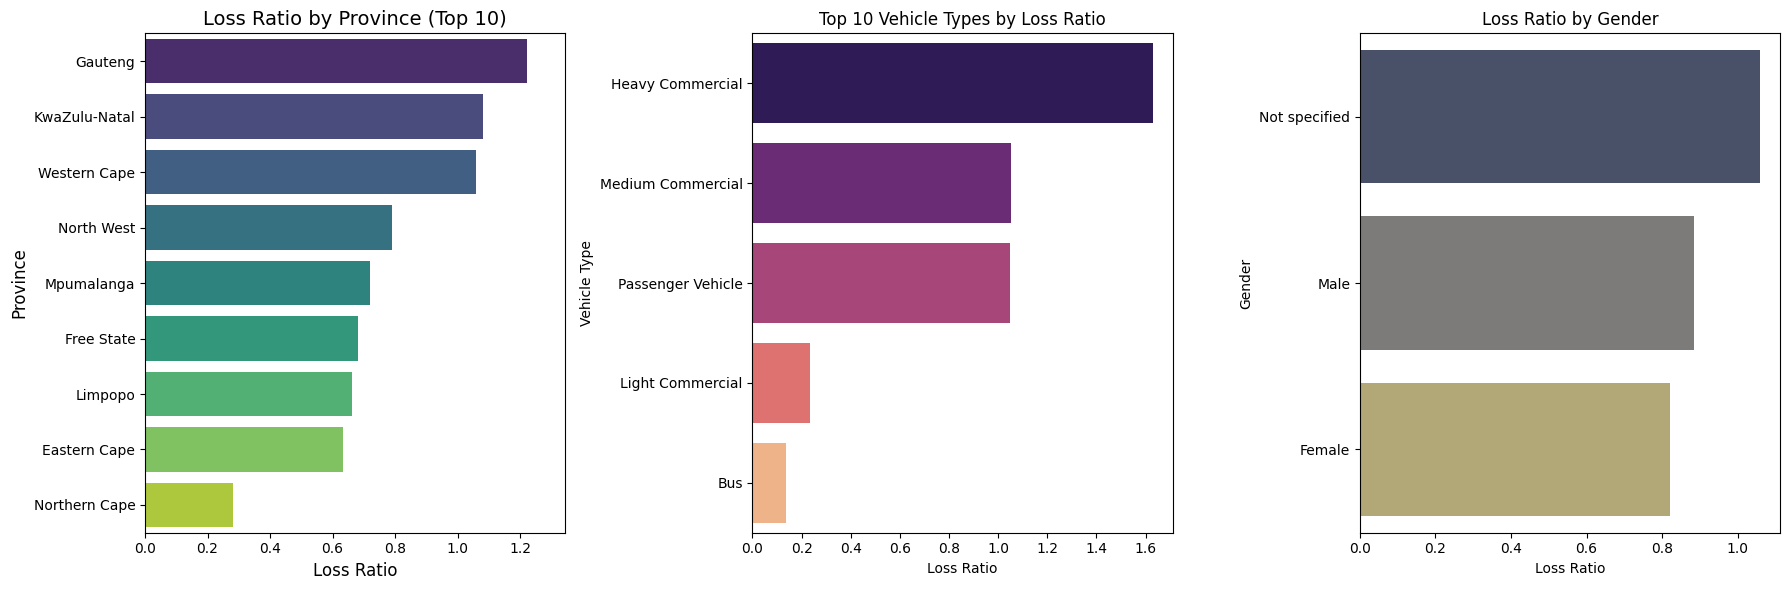

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 3: Guiding Question 1: Overall Loss Ratio and Variation ---
print("\n--- Step 3: Loss Ratio Analysis ---")

# Calculate Overall Loss Ratio
total_claims_sum = df['TotalClaims'].sum()
total_premium_sum = df['TotalPremium'].sum()

# Handle potential division by zero if TotalPremium is 0
if total_premium_sum > 0:
    overall_loss_ratio = total_claims_sum / total_premium_sum
    print(f"\nOverall Loss Ratio for the portfolio: {overall_loss_ratio:,.2f}")
else:
    print("\nCannot calculate overall loss ratio: TotalPremium is zero.")
    overall_loss_ratio = np.nan # Assign NaN if cannot calculate

# Function to calculate Loss Ratio by a given column
def calculate_loss_ratio_by_category(dataframe, category_col):
    if dataframe['TotalPremium'].sum() == 0:
        print(f"Warning: TotalPremium for {category_col} is zero, cannot calculate Loss Ratio.")
        return pd.DataFrame()

    loss_ratio_df = dataframe.groupby(category_col).agg(
        TotalClaims=('TotalClaims', 'sum'),
        TotalPremium=('TotalPremium', 'sum')
    ).reset_index()
    # Filter out categories where TotalPremium is 0 to avoid division by zero
    loss_ratio_df = loss_ratio_df[loss_ratio_df['TotalPremium'] > 0].copy()
    loss_ratio_df['LossRatio'] = loss_ratio_df['TotalClaims'] / loss_ratio_df['TotalPremium']
    loss_ratio_df = loss_ratio_df.sort_values(by='LossRatio', ascending=False)
    return loss_ratio_df

print("\nLoss Ratio by Province:")
province_loss_ratio = calculate_loss_ratio_by_category(df, 'Province')
print(province_loss_ratio)

print("\nLoss Ratio by VehicleType:")
vehicle_type_loss_ratio = calculate_loss_ratio_by_category(df, 'VehicleType')
print(vehicle_type_loss_ratio) # Show top few as there might be many types

print("\nLoss Ratio by Gender:")
gender_loss_ratio = calculate_loss_ratio_by_category(df, 'Gender')
print(gender_loss_ratio)


# Visualization: Loss Ratio by Categories
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='LossRatio', y='Province', data=province_loss_ratio.head(10), palette='viridis')
plt.title('Loss Ratio by Province (Top 10)', fontsize=14)
plt.xlabel('Loss Ratio', fontsize=12)
plt.ylabel('Province', fontsize=12)
plt.xlim(0, max(province_loss_ratio['LossRatio'].max() * 1.1, 1.0))

plt.subplot(1, 3, 2)
# Limiting to top N vehicle types for readability
top_n_vehicle_types = vehicle_type_loss_ratio.head(10)
sns.barplot(x='LossRatio', y='VehicleType', data=top_n_vehicle_types, palette='magma')
plt.title('Top 10 Vehicle Types by Loss Ratio')
plt.xlabel('Loss Ratio')
plt.ylabel('Vehicle Type')

plt.subplot(1, 3, 3)
sns.barplot(x='LossRatio', y='Gender', data=gender_loss_ratio, palette='cividis')
plt.title('Loss Ratio by Gender')
plt.xlabel('Loss Ratio')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()


--- Step 4: Distributions and Outliers of Key Financial Variables ---


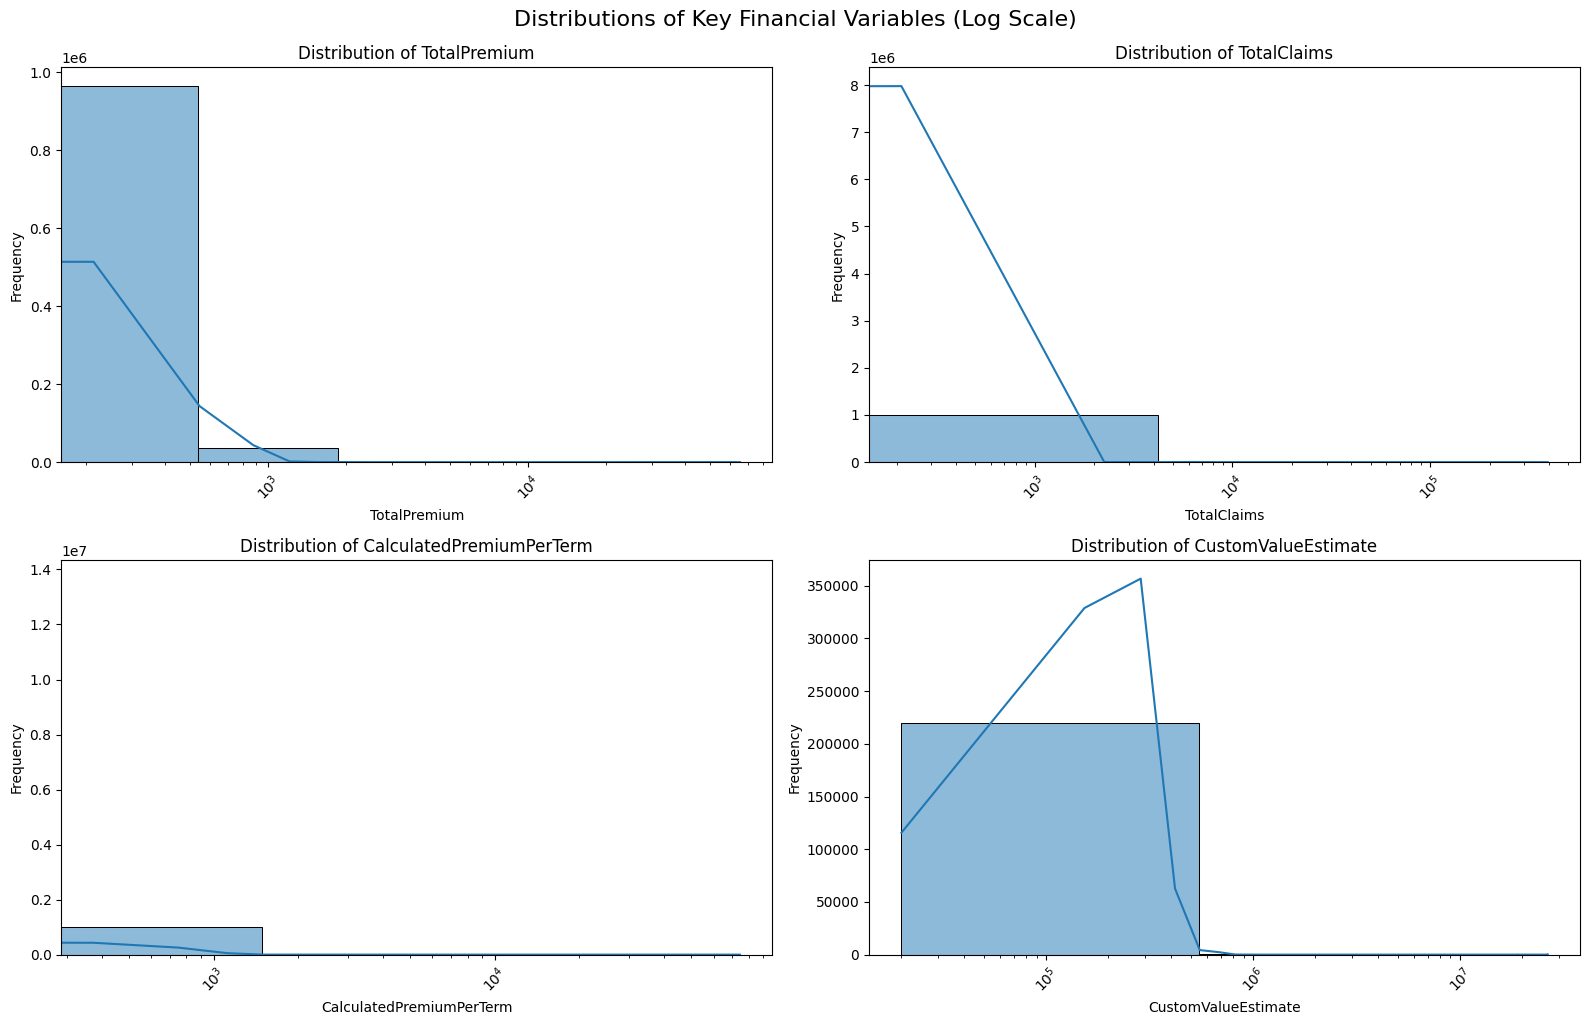

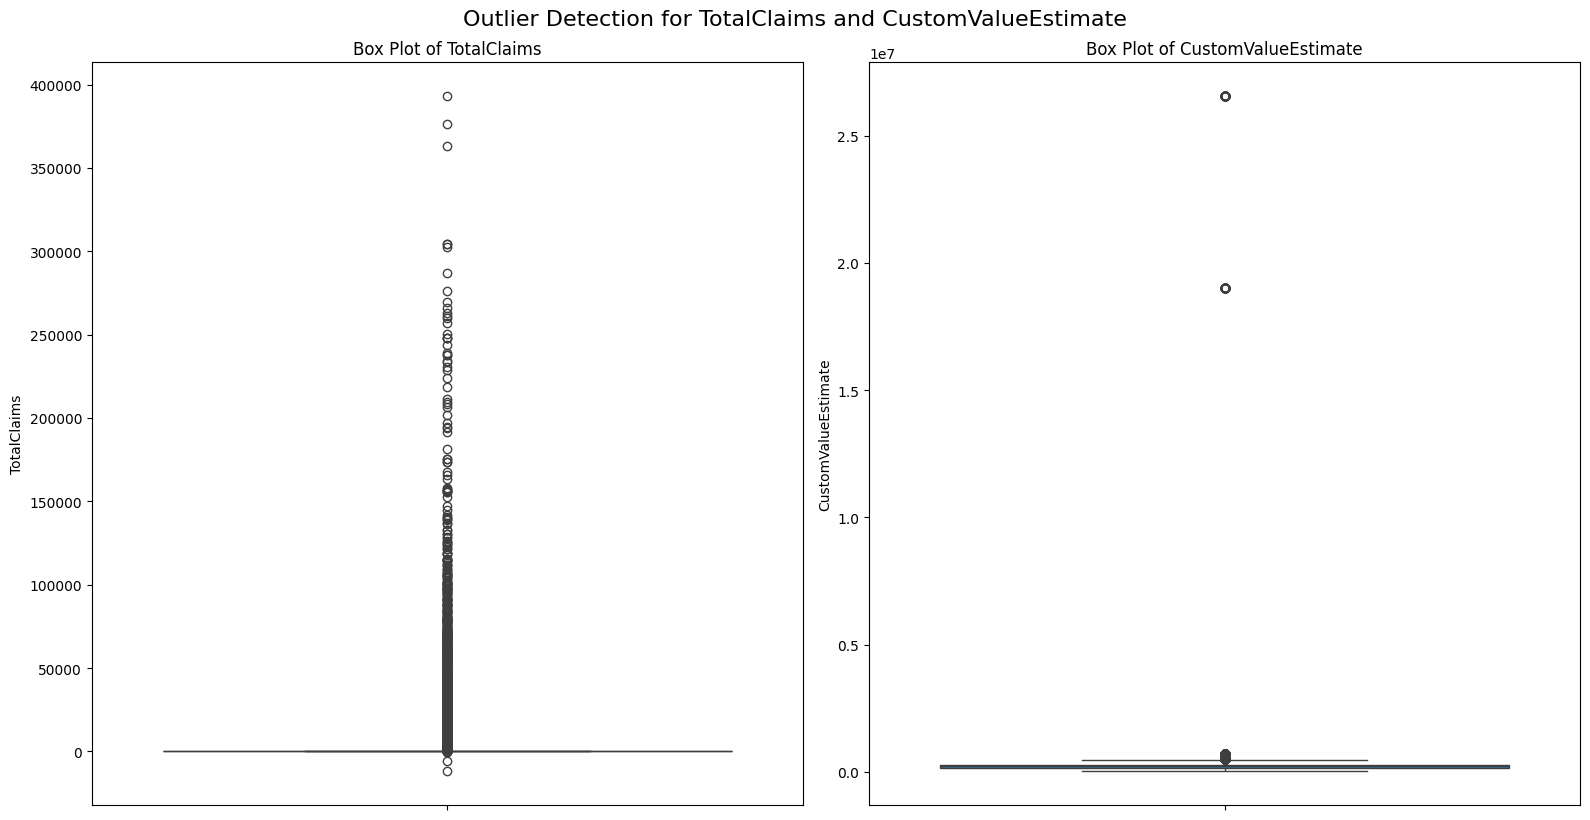

Column 'TotalClaims': 2793 outliers detected (outside 1.5*IQR).
   Min outlier value: 139.04
   Max outlier value: 393,092.11
Column 'CustomValueEstimate': 1785 outliers detected (outside 1.5*IQR).
   Min outlier value: 500,000.00
   Max outlier value: 26,550,000.00


In [9]:
# --- Step 4: Guiding Question 2: Distributions and Outliers of Key Financial Variables ---
print("\n--- Step 4: Distributions and Outliers of Key Financial Variables ---")

financial_cols = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']

plt.figure(figsize=(16, 10))
for i, col in enumerate(financial_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xscale('log') # Use log scale for x-axis if data is highly skewed (common for financial data)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Distributions of Key Financial Variables (Log Scale)', y=1.02, fontsize=16)
plt.show()

# Outlier Detection using Box Plots
plt.figure(figsize=(16, 8))
for i, col in enumerate(['TotalClaims', 'CustomValueEstimate']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Outlier Detection for TotalClaims and CustomValueEstimate', y=1.02, fontsize=16)
plt.show()

# Quantify outliers (e.g., using IQR method)
for col in ['TotalClaims', 'CustomValueEstimate']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {outliers_count} outliers detected (outside 1.5*IQR).")
    if outliers_count > 0:
        print(f"   Min outlier value: {df[df[col] > upper_bound][col].min():,.2f}")
        print(f"   Max outlier value: {df[df[col] > upper_bound][col].max():,.2f}")


--- Step 5: Temporal Trends Analysis ---

Monthly Claim Frequency and Severity:
   TransactionMonth  ClaimFrequency  ClaimSeverity
0        2013-10-01        0.000000            NaN
1        2013-11-01        0.001672   25292.539474
2        2013-12-01        0.002007    3094.461988
3        2014-01-01        0.001095    6218.429825
4        2014-02-01        0.002910   10498.217836
5        2014-03-01        0.003462   26898.751798
6        2014-04-01        0.002891   15343.179605
7        2014-05-01        0.002952   18501.526310
8        2014-06-01        0.002368   18019.157018
9        2014-07-01        0.001811   15888.230403
10       2014-08-01        0.002599   13596.464912
11       2014-09-01        0.001847   18935.467694
12       2014-10-01        0.002750   18975.194895
13       2014-11-01        0.003710   21196.900015
14       2014-12-01        0.003298   30278.995646
15       2015-01-01        0.003493   21978.094542
16       2015-02-01        0.003450   21838.511860
1

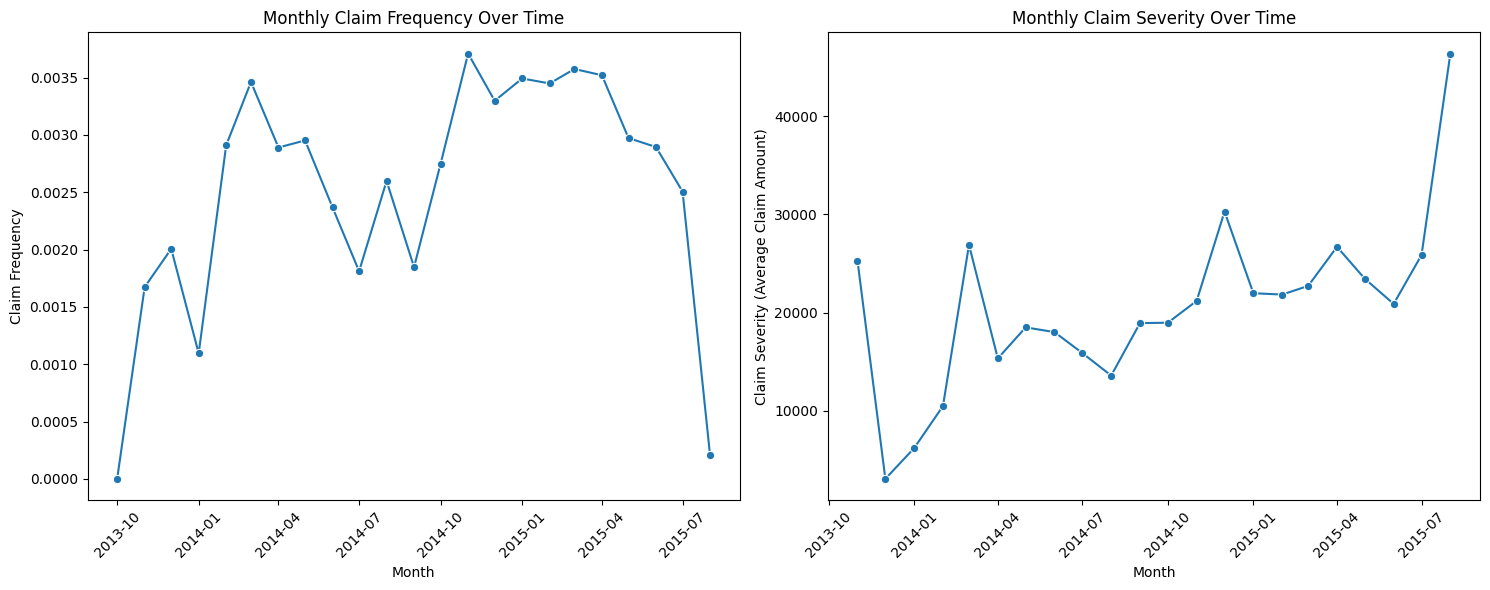

In [10]:
import numpy as np
# --- Step 5: Guiding Question 3: Temporal Trends ---
print("\n--- Step 5: Temporal Trends Analysis ---")

# Group by month
monthly_data = df.groupby('TransactionMonth').agg(
    TotalClaims=('TotalClaims', 'sum'),
    TotalPremium=('TotalPremium', 'sum'),
    NumPolicies=('PolicyID', 'count') # Assuming each PolicyID is a unique policy
).reset_index()

# Calculate Claim Frequency: number of unique policies with a claim per month / total policies per month
# First, create a flag for policies with claims
df_claims_flag = df.copy()
df_claims_flag['HasClaim'] = (df_claims_flag['TotalClaims'] > 0).astype(int)
monthly_claims_metrics = df_claims_flag.groupby('TransactionMonth').agg(
    PoliciesWithClaims=('HasClaim', lambda x: (x > 0).sum()), # Count policies with at least one claim
    TotalPolicies=('PolicyID', 'count'), # Total policies
    TotalClaimsSum=('TotalClaims', 'sum') # Sum of claims for severity
).reset_index()

monthly_claims_metrics['ClaimFrequency'] = monthly_claims_metrics['PoliciesWithClaims'] / monthly_claims_metrics['TotalPolicies']
# Calculate Claim Severity: Average claim amount for policies where a claim occurred
monthly_claims_metrics['ClaimSeverity'] = monthly_claims_metrics['TotalClaimsSum'] / monthly_claims_metrics['PoliciesWithClaims']
# Handle cases where PoliciesWithClaims might be 0 to avoid division by zero for severity
monthly_claims_metrics['ClaimSeverity'] = monthly_claims_metrics['ClaimSeverity'].replace([np.inf, -np.inf], np.nan)


print("\nMonthly Claim Frequency and Severity:")
print(monthly_claims_metrics[['TransactionMonth', 'ClaimFrequency', 'ClaimSeverity']])

# Plot temporal trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='TransactionMonth', y='ClaimFrequency', data=monthly_claims_metrics, marker='o')
plt.title('Monthly Claim Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(x='TransactionMonth', y='ClaimSeverity', data=monthly_claims_metrics, marker='o')
plt.title('Monthly Claim Severity Over Time')
plt.xlabel('Month')
plt.ylabel('Claim Severity (Average Claim Amount)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


--- Step 6: Vehicle Make/Model and Claim Amounts ---

Top 10 Make/Models by Average Claim Amount:
               make                               Model  AvgClaimAmount  \
128      VOLKSWAGEN  CRAFTER 50 2.0 TDi HR 80KW F/C P/V    76660.915526   
4              AUDI         A4 1.8T S AVANT MULTITRONIC    66999.458882   
30   GOLDEN JOURNEY                     MAKOYA 2.4i 16S    65003.423246   
42    MERCEDES-BENZ                       C180 BE COUPE    58287.187719   
9             B.A.W               SASUKA 2.7i (16 SEAT)    47856.245614   
98           TOYOTA                        ETIOS 1.5 Xs    38389.223684   
29   GOLDEN JOURNEY                       IBHUBEZI 2.2i    38239.744691   
64    MERCEDES-BENZ            SPRINTER 519 CDi F/C P/V    36423.821175   
37            IVECO                  50 C15V 15 F/C P/V    35736.884921   
20              CMC                         AMANDLA 2.2    32529.616858   

     NumClaims  
128         10  
4            8  
30           8  
42     

/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_19245/770666215.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AvgClaimAmount', y=highest_claims_makes_models['make'] + ' ' + highest_claims_makes_models['Model'],
/var/folders/g_/m25c6v895h36wbhhdpssj2rh0000gp/T/ipykernel_19245/770666215.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AvgClaimAmount', y=lowest_claims_makes_models['make'] + ' ' + lowest_claims_makes_models['Model'],


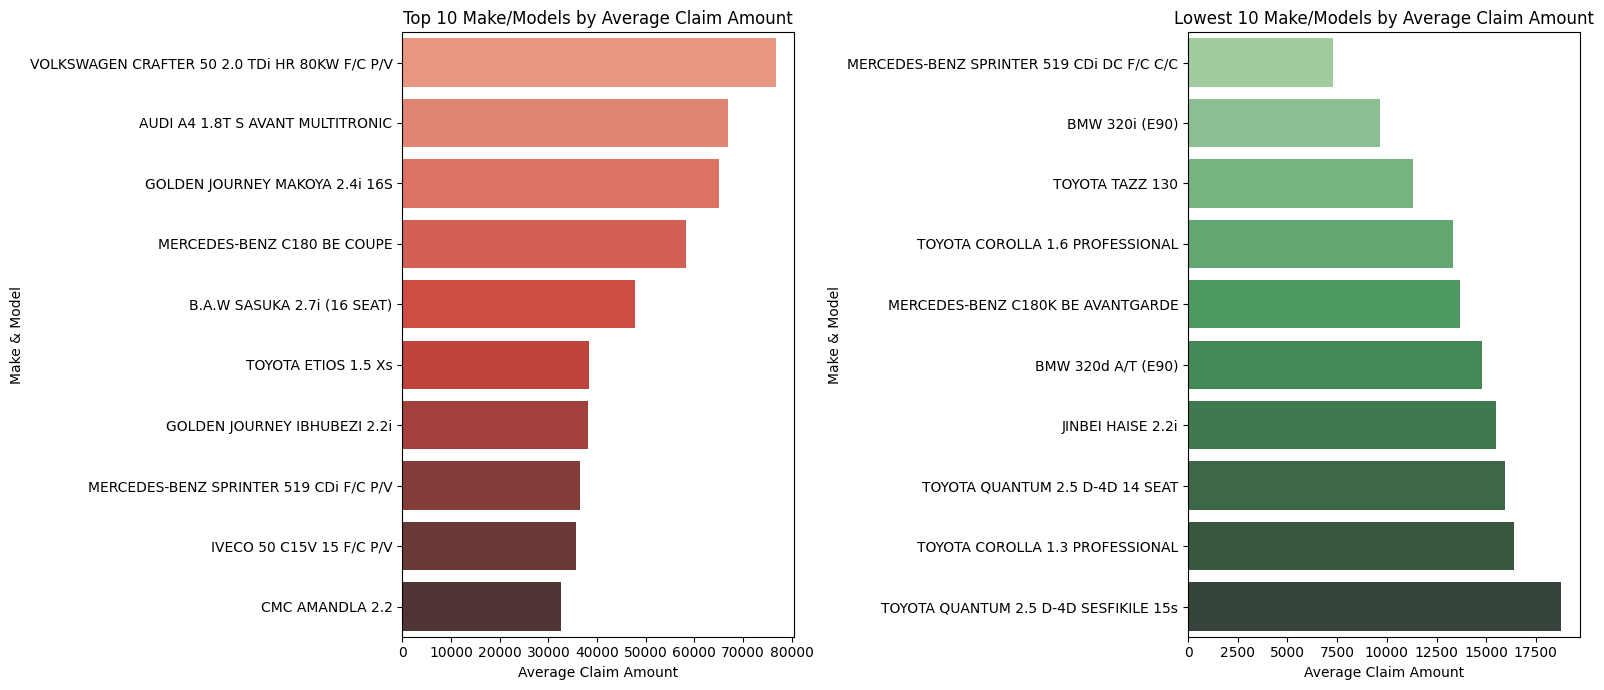

In [11]:
# --- Step 6: Guiding Question 4: Vehicle Make/Model and Claim Amounts ---
print("\n--- Step 6: Vehicle Make/Model and Claim Amounts ---")

# Filter for policies with claims to calculate average claim amounts meaningfully
claims_df = df[df['TotalClaims'] > 0].copy()

# Group by Make and Model to find average claim amount
make_model_claims = claims_df.groupby(['make', 'Model']).agg(
    AvgClaimAmount=('TotalClaims', 'mean'),
    NumClaims=('TotalClaims', 'count')
).reset_index()

# Filter out make/models with very few claims to ensure reliable averages
# (e.g., require at least 5 claims to consider the average robust)
min_claims_threshold = 5
reliable_make_model_claims = make_model_claims[make_model_claims['NumClaims'] >= min_claims_threshold]

# Identify top 10 highest claim amounts
highest_claims_makes_models = reliable_make_model_claims.sort_values(by='AvgClaimAmount', ascending=False).head(10)
print("\nTop 10 Make/Models by Average Claim Amount:")
print(highest_claims_makes_models)

# Identify top 10 lowest claim amounts
lowest_claims_makes_models = reliable_make_model_claims.sort_values(by='AvgClaimAmount', ascending=True).head(10)
print("\nTop 10 Make/Models by Lowest Claim Amount:")
print(lowest_claims_makes_models)

# Visualization: Top/Lowest Make/Models by Average Claim Amount
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='AvgClaimAmount', y=highest_claims_makes_models['make'] + ' ' + highest_claims_makes_models['Model'],
            data=highest_claims_makes_models, palette='Reds_d')
plt.title(f'Top {len(highest_claims_makes_models)} Make/Models by Average Claim Amount')
plt.xlabel('Average Claim Amount')
plt.ylabel('Make & Model')

plt.subplot(1, 2, 2)
sns.barplot(x='AvgClaimAmount', y=lowest_claims_makes_models['make'] + ' ' + lowest_claims_makes_models['Model'],
            data=lowest_claims_makes_models, palette='Greens_d')
plt.title(f'Lowest {len(lowest_claims_makes_models)} Make/Models by Average Claim Amount')
plt.xlabel('Average Claim Amount')
plt.ylabel('Make & Model')

plt.tight_layout()
plt.show()